In [14]:
import pandas as pd 
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Dimensioni del dataset:", df.shape)
print("\nInformazioni sui metadati:")
print(df.info())

Dimensioni del dataset: (388920, 67)

Informazioni sui metadati:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388920 entries, 0 to 388919
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388920 non-null  object 
 1   continent                                   370329 non-null  object 
 2   location                                    388920 non-null  object 
 3   date                                        388920 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_d

In [3]:
#trovare il numero di casi totali avvenuti in quello stesso continente, senza considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

In [5]:
df_con_continente = df[df['continent'].notnull()]

In [4]:
casi_per_continente = df.groupby('continent')['total_cases'].sum()
print("Numero totale di casi per continente:")
print(casi_per_continente)

Numero totale di casi per continente:
continent
Africa           1.286876e+10
Asia             2.120759e+11
Europe           2.031561e+11
North America    1.105376e+11
Oceania          9.609695e+09
South America    6.434761e+10
Name: total_cases, dtype: float64


In [ ]:
#date due variabili contenenti i nomi di continenti, confrontare i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [8]:
casi_totali_mondo = df['total_cases'].sum()
casi_per_continente = df.groupby('continent')['total_cases'].sum()

continente_1 = 'Europe'  
continente_2 = 'Africa'  
df_continente_1 = df[df['continent'] == continente_1]
df_continente_2 = df[df['continent'] == continente_2]

statistiche_continente_1 = {
    'Valore massimo': df_continente_1['total_cases'].max(),
    'Media': df_continente_1['total_cases'].mean(),
    'Percentuale rispetto al numero totale di casi nel mondo': (df_continente_1['total_cases'].sum() / casi_totali_mondo) * 100
}

statistiche_continente_2 = {
    'Valore massimo': df_continente_2['total_cases'].max(),
    'Media': df_continente_2['total_cases'].mean(),
    'Percentuale rispetto al numero totale di casi nel mondo': (df_continente_2['total_cases'].sum() / casi_totali_mondo) * 100
}

print("Statistiche per", continente_1, ":", descrittore_continente_1)
print("Statistiche per", continente_2, ":", descrittore_continente_2)

Statistiche per Europe : {'Valore massimo': 38997490.0, 'Media': 2679982.5787612954, 'Percentuale rispetto al numero totale di casi nel mondo': 7.82552932158371}
Statistiche per Africa : {'Valore massimo': 4072636.0, 'Media': 155741.42827578695, 'Percentuale rispetto al numero totale di casi nel mondo': 0.4957018618393822}


In [ ]:
#Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data

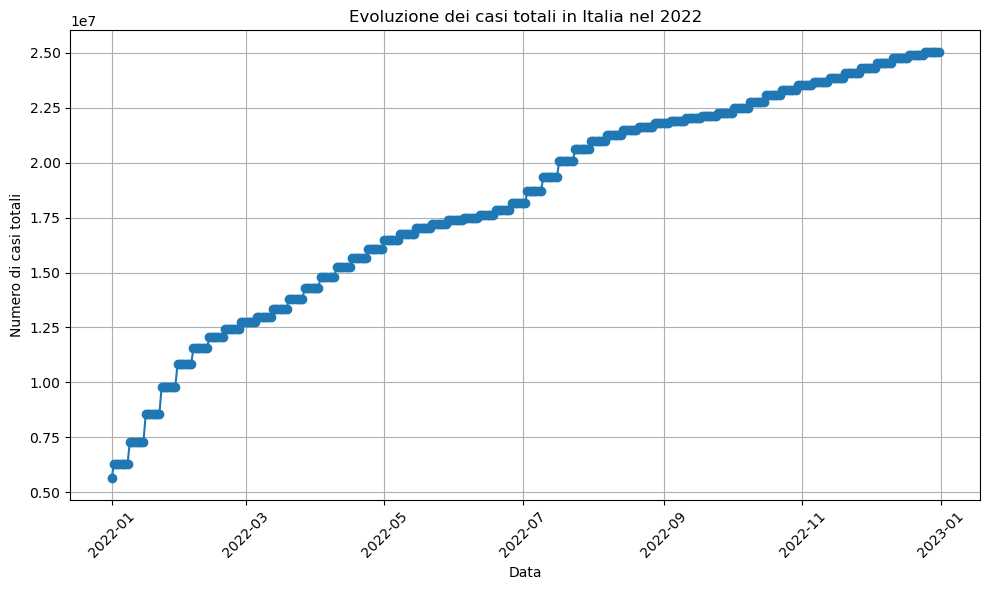

In [11]:
df['date'] = pd.to_datetime(df['date'])
df_italia_2022 = df[(df['iso_code'] == 'ITA') & (df['date'].dt.year == 2022)]
casi_totali_per_data = df_italia_2022.groupby('date')['total_cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(casi_totali_per_data.index, casi_totali_per_data.values, marker='o', linestyle='-')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di casi totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Mostrare con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario)

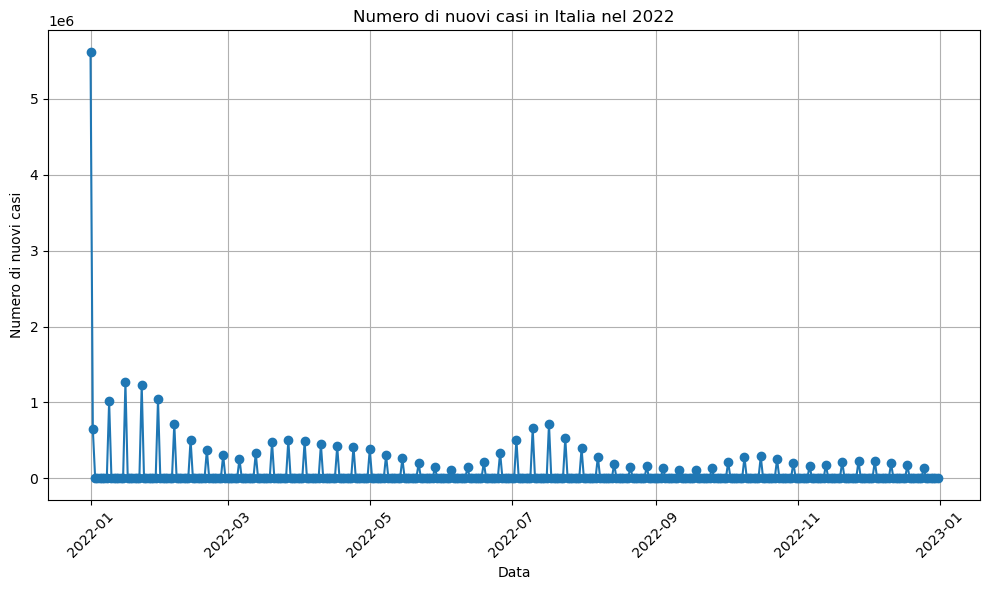

In [12]:
df['date'] = pd.to_datetime(df['date'])
df_italia_2022 = df[(df['iso_code'] == 'ITA') & (df['date'].dt.year == 2022)]
nuovi_casi_per_data = casi_totali_per_data.diff().fillna(casi_totali_per_data.iloc[0])
plt.figure(figsize=(10, 6))
plt.plot(nuovi_casi_per_data.index, nuovi_casi_per_data.values, marker='o', linestyle='-')
plt.title('Numero di nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Mostrare un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

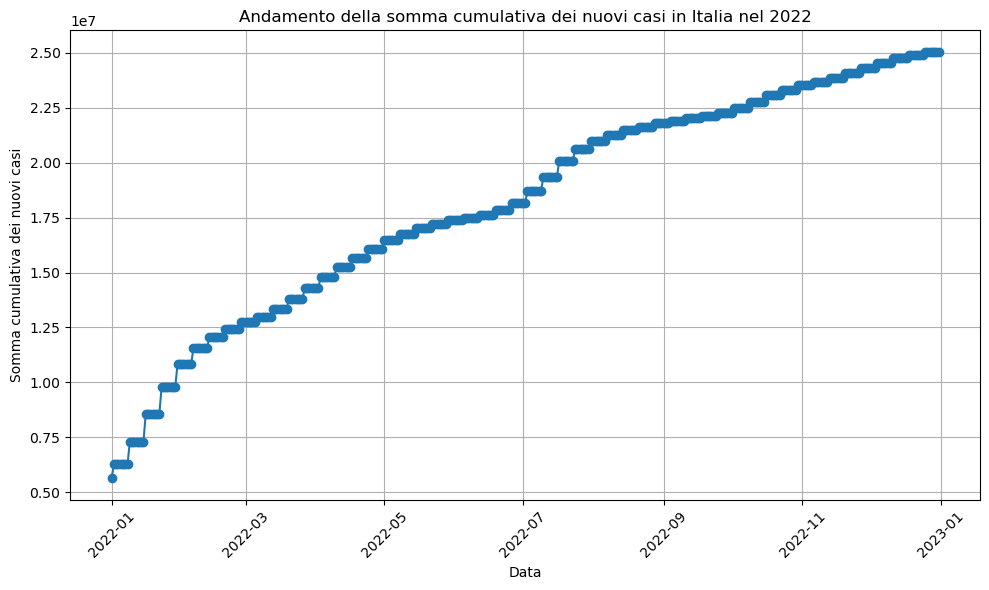

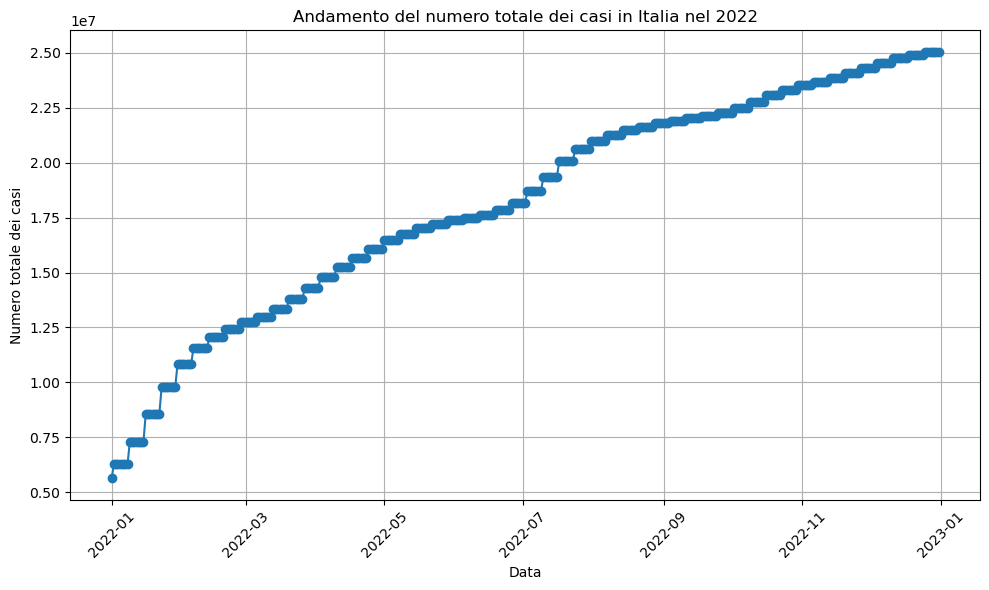

In [13]:
nuovi_casi_per_data = casi_totali_per_data.diff().fillna(casi_totali_per_data.iloc[0])
cumulative_nuovi_casi_per_data = nuovi_casi_per_data.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(cumulative_nuovi_casi_per_data.index, cumulative_nuovi_casi_per_data.values, marker='o', linestyle='-')
plt.title('Andamento della somma cumulativa dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma cumulativa dei nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(casi_totali_per_data.index, casi_totali_per_data.values, marker='o', linestyle='-')
plt.title('Andamento del numero totale dei casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero totale dei casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

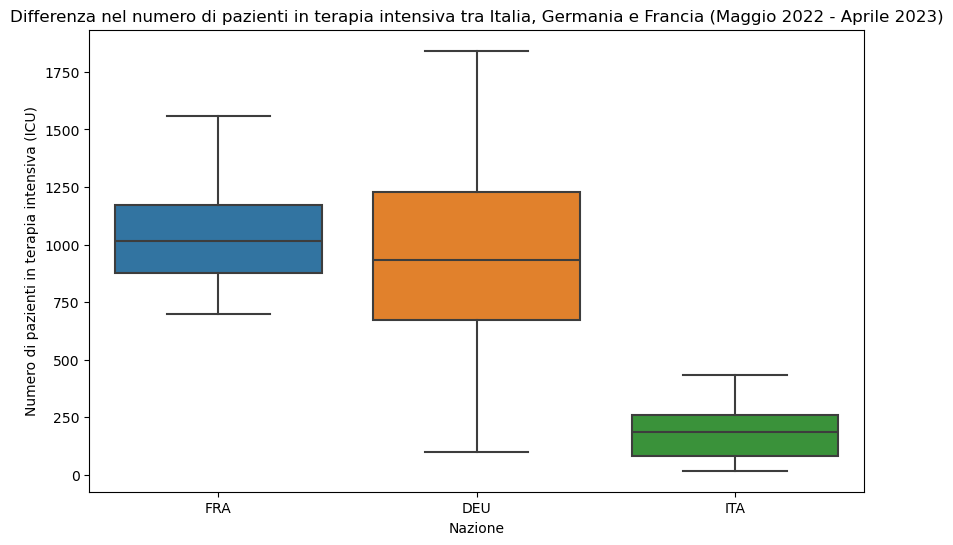

In [27]:
df['date'] = pd.to_datetime(df['date'])
df_selected = df[(df['date'].dt.year >= 2022) & (df['date'].dt.month >= 5) & (df['location'].isin(['Italy', 'Germany', 'France']))]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selected, x='iso_code', y='icu_patients')
plt.title('Differenza nel numero di pazienti in terapia intensiva tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva (ICU)')
plt.show()


In [ ]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospedalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno (scelta: sostituzione con il valore medio)

In [28]:
df['date'] = pd.to_datetime(df['date'])
df_2023_selected = df[(df['date'].dt.year == 2023) & (df['location'].isin(['Italy', 'Germany', 'France', 'Spain']))]
df_2023_selected.loc[:,'hosp_patients'] = df_2023_selected.groupby('location')['hosp_patients'].transform(lambda x: x.fillna(x.mean()))
pazienti_ospedalizzati_per_nazione = df_2023_selected.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospedalizzati per ogni nazione nel 2023:")
print(pazienti_ospedalizzati_per_nazione)

Somma dei pazienti ospedalizzati per ogni nazione nel 2023:
location
France     5.607106e+06
Germany    0.000000e+00
Italy      1.175272e+06
Spain      7.989490e+05
Name: hosp_patients, dtype: float64
